## Начало лабораторной

Цены на кофе - https://www.kaggle.com/datasets/mayankanand2701/starbucks-stock-price-dataset

## Выгрузка данных

In [3]:
import pandas as pd
df = pd.read_csv("./static/csv/Starbucks Dataset.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


## Атрибуты

Date — Дата

Open — Цена открытия

High — Макс. цена

Low — Мин. цена

Close — Цена закрытия

Adj Close — Скорректированная цена закрытия

Volume — Объем торгов

## Выбор входных и выходных переменных

Входные переменные будут Open (цена открытия) и Volume (объем торгов)

Выходная переменная - Close (цена закрытия)

## Настройка параметров лингвистических переменных

Термы: Низкий (Low) Средний (Medium) Высокий (High)

Параметры:

Низкий (Low): Нижняя граница: 0 Средняя граница: 3000 Верхняя граница: 6000

Средний (Medium): Нижняя граница: 4000 Средняя граница: 8000 Верхняя граница: 10000

Высокий (High): Нижняя граница: 9000 Средняя граница: 10000 Верхняя граница: 12000

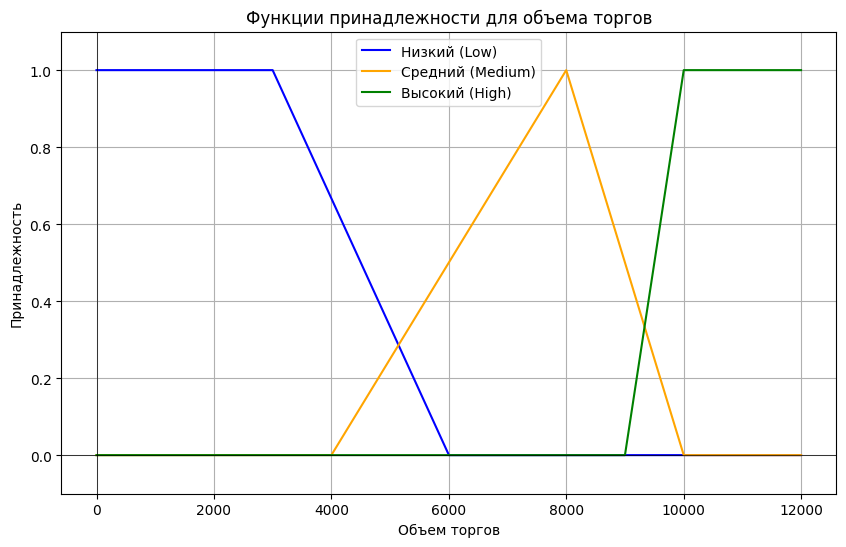

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Определяем диапазон значений для объема торгов
volume_range = np.arange(0, 12000, 1)

# Определение функций принадлежности для термов

# Низкий (Low)
low = fuzz.trapmf(volume_range, [0, 0, 3000, 6000])

# Средний (Medium)
medium = fuzz.trimf(volume_range, [4000, 8000, 10000])

# Высокий (High)
high = fuzz.trapmf(volume_range, [9000, 10000, 12000, 12000])

# Визуализация функций принадлежности
plt.figure(figsize=(10, 6))
plt.plot(volume_range, low, label='Низкий (Low)', color='blue')
plt.plot(volume_range, medium, label='Средний (Medium)', color='orange')
plt.plot(volume_range, high, label='Высокий (High)', color='green')
plt.title('Функции принадлежности для объема торгов')
plt.xlabel('Объем торгов')
plt.ylabel('Принадлежность')
plt.ylim(-0.1, 1.1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid()

# Отображаем график
plt.show()


## Формирование базы нечетких правил

Нечеткие правила:
Если Цена открытия Низкая И Объем Низкий, Тогда Цена закрытия Низкая.
Если Цена открытия Низкая И Объем Средний, Тогда Цена закрытия Средняя.
Если Цена открытия Низкая И Объем Высокий, Тогда Цена закрытия Средняя.
Если Цена открытия Средняя И Объем Низкий, Тогда Цена закрытия Средняя.
Если Цена открытия Средняя И Объем Средний, Тогда Цена закрытия Высокая.
Если Цена открытия Средняя И Объем Высокий, Тогда Цена закрытия Высокая.
Если Цена открытия Высокая И Объем Низкий, Тогда Цена закрытия Средняя.
Если Цена открытия Высокая И Объем Средний, Тогда Цена закрытия Высокая.
Если Цена открытия Высокая И Объем Высокий, Тогда Цена закрытия Высокая.


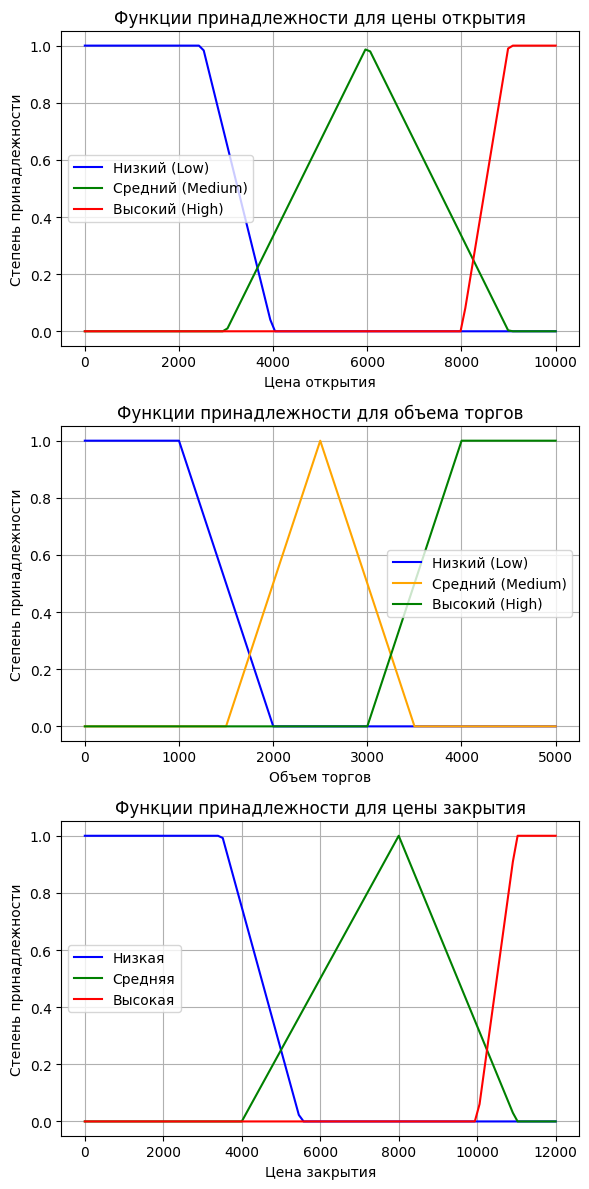

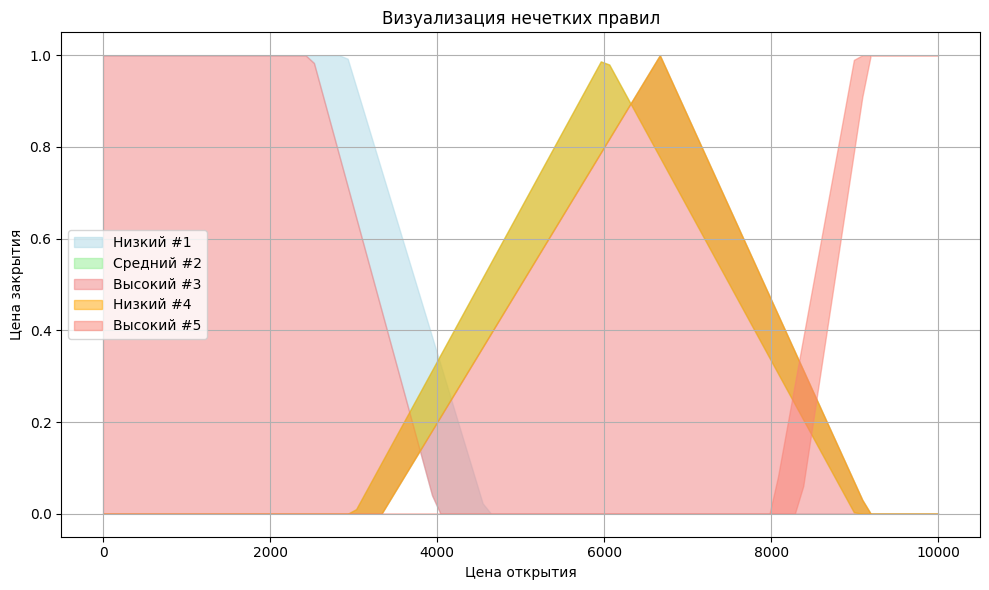

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Определяем диапазоны значений для входных переменных
x_open = np.linspace(0, 10000, 100)  # Цена открытия
x_volume = np.arange(0, 5001, 1)      # Объем торгов
x_close = np.linspace(0, 12000, 100)  # Цена закрытия

# Определение функций принадлежности для цены открытия
low_open = fuzz.trapmf(x_open, [0, 0, 2500, 4000])
medium_open = fuzz.trimf(x_open, [3000, 6000, 9000])
high_open = fuzz.trapmf(x_open, [8000, 9000, 10000, 10000])

# Определение функций принадлежности для объема торгов
low_volume = fuzz.trapmf(x_volume, [0, 0, 1000, 2000])
medium_volume = fuzz.trimf(x_volume, [1500, 2500, 3500])
high_volume = fuzz.trapmf(x_volume, [3000, 4000, 5000, 5000])

# Определение функций принадлежности для цены закрытия
low_close = fuzz.trapmf(x_close, [0, 0, 3500, 5500])
medium_close = fuzz.trimf(x_close, [4000, 8000, 11000])
high_close = fuzz.trapmf(x_close, [10000, 11000, 12000, 12000])

# Определение нечетких правил
fuzzy_rules = [
    ("Низкая", "Низкий", "Низкая"),
    ("Низкая", "Средний", "Средняя"),
    ("Низкая", "Высокий", "Средняя"),
    ("Средняя", "Низкий", "Средняя"),
    ("Средняя", "Средний", "Высокая"),
    ("Средняя", "Высокий", "Высокая"),
    ("Высокая", "Низкий", "Средняя"),
    ("Высокая", "Средний", "Высокая"),
    ("Высокая", "Высокий", "Высокая"),
]

# Вывод правил
print("Нечеткие правила:")
for rule in fuzzy_rules:
    print(f"Если Цена открытия {rule[0]} И Объем {rule[1]}, Тогда Цена закрытия {rule[2]}.")

# Визуализация функций принадлежности
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Цена открытия
axs[0].plot(x_open, low_open, label='Низкий (Low)', color='blue')
axs[0].plot(x_open, medium_open, label='Средний (Medium)', color='green')
axs[0].plot(x_open, high_open, label='Высокий (High)', color='red')
axs[0].set_title('Функции принадлежности для цены открытия')
axs[0].set_xlabel('Цена открытия')
axs[0].set_ylabel('Степень принадлежности')
axs[0].legend()
axs[0].grid()

# Объем торгов
axs[1].plot(x_volume, low_volume, label='Низкий (Low)', color='blue')
axs[1].plot(x_volume, medium_volume, label='Средний (Medium)', color='orange')
axs[1].plot(x_volume, high_volume, label='Высокий (High)', color='green')
axs[1].set_title('Функции принадлежности для объема торгов')
axs[1].set_xlabel('Объем торгов')
axs[1].set_ylabel('Степень принадлежности')
axs[1].legend()
axs[1].grid()

# Цена закрытия
axs[2].plot(x_close, low_close, label='Низкая', color='blue')
axs[2].plot(x_close, medium_close, label='Средняя', color='green')
axs[2].plot(x_close, high_close, label='Высокая', color='red')
axs[2].set_title('Функции принадлежности для цены закрытия')
axs[2].set_xlabel('Цена закрытия')
axs[2].set_ylabel('Степень принадлежности')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

# Визуализация нечетких правил
fig, ax = plt.subplots(figsize=(10, 6))

# Пример нечеткого вывода для визуализации (примерные значения)
for rule in fuzzy_rules:
    # Определение степени уверенности для каждого правила
    if rule[0] == "Низкая" and rule[1] == "Низкий":
        ax.fill_between(x_open, low_open, low_close, color='lightblue', alpha=0.5, label='Низкий #1')
    elif rule[0] == "Низкая" and rule[1] == "Средний":
        ax.fill_between(x_open, medium_open, medium_close, color='lightgreen', alpha=0.5, label='Средний #2')
    elif rule[0] == "Низкая" and rule[1] == "Высокий":
        ax.fill_between(x_open, low_open, medium_close, color='lightcoral', alpha=0.5, label='Высокий #3')
    elif rule[0] == "Средняя" and rule[1] == "Низкий":
        ax.fill_between(x_open, medium_open, medium_close, color='orange', alpha=0.5, label='Низкий #4')
    elif rule[0] == "Высокая" and rule[1] == "Высокий":
        ax.fill_between(x_open, high_open, high_close, color='salmon', alpha=0.5, label='Высокий #5')

ax.set_title('Визуализация нечетких правил')
ax.set_xlabel('Цена открытия')
ax.set_ylabel('Цена закрытия')
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Оценка качества полученной нечеткой системы, используя метрики регрессии

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Определяем диапазоны значений для входных переменных
x_open = np.linspace(0, 10000, 100)  # Цена открытия
x_volume = np.arange(0, 5001, 1)      # Объем торгов
x_close = np.linspace(0, 12000, 100)  # Цена закрытия

# Определение функций принадлежности для цены открытия
low_open = fuzz.trapmf(x_open, [0, 0, 2000, 4000])
medium_open = fuzz.trimf(x_open, [3000, 6000, 8000])
high_open = fuzz.trapmf(x_open, [7000, 9000, 10000, 10000])

# Определение функций принадлежности для объема торгов
low_volume = fuzz.trapmf(x_volume, [0, 0, 500, 1000])
medium_volume = fuzz.trimf(x_volume, [800, 2000, 3000])
high_volume = fuzz.trapmf(x_volume, [2500, 3500, 5000, 5000])

# Определение функций принадлежности для цены закрытия
low_close = fuzz.trapmf(x_close, [0, 0, 3000, 6000])
medium_close = fuzz.trimf(x_close, [4000, 8000, 10000])
high_close = fuzz.trapmf(x_close, [9000, 10000, 12000, 12000])

# Создаем тестовые данные (цена открытия, объем, эталонная цена закрытия)
test_data = [
    (2500, 800, 3500),   # Низкая цена открытия и объем
    (5000, 1500, 7000),  # Средняя цена открытия и объем
    (9000, 3500, 11000), # Высокая цена открытия и объем
    (4000, 1000, 5000),  # Средняя цена открытия и низкий объем
]

# Функция для вычисления нечеткой оценки
def fuzzy_inference(open_price, volume):
    # Определяем степень принадлежности
    open_low = fuzz.interp_membership(x_open, low_open, open_price)
    open_medium = fuzz.interp_membership(x_open, medium_open, open_price)
    open_high = fuzz.interp_membership(x_open, high_open, open_price)

    volume_low = fuzz.interp_membership(x_volume, low_volume, volume)
    volume_medium = fuzz.interp_membership(x_volume, medium_volume, volume)
    volume_high = fuzz.interp_membership(x_volume, high_volume, volume)

    # Применяем правила
    close_low = np.fmin(open_low, volume_low)
    close_medium = np.fmin(open_medium, volume_medium)
    close_high = np.fmin(open_high, volume_high)

    # Вычисление выходных значений с учетом ненулевых областей
    close0 = fuzz.defuzz(x_close, low_close * close_low, 'centroid') if close_low > 0 else 0
    close1 = fuzz.defuzz(x_close, medium_close * close_medium, 'centroid') if close_medium > 0 else 0
    close2 = fuzz.defuzz(x_close, high_close * close_high, 'centroid') if close_high > 0 else 0

    return max(close0, close1, close2)

# Список для хранения результатов
results = []

# Оценка системы на тестовом наборе данных
for open_price, volume, actual_close in test_data:
    inferred_close = fuzzy_inference(open_price, volume)
    results.append((open_price, volume, actual_close, inferred_close))

# Вывод результатов с более структурированным оформлением
print(f"{'Цена открытия':<18} | {'Объем торгов':<10} | {'Фактическая цена закрытия':<30} | {'Полученная цена закрытия':<30}")
print("=" * 92)  # Строка-разделитель

for open_price, volume, actual_close, inferred_close in results:
    print(f"{open_price:<18} | {volume:<10} | {actual_close:<30} | {inferred_close:<30.2f}")

# Вычисление метрик качества
actual_closes = [actual for _, _, actual, _ in results]
inferred_closes = [inferred for _, _, _, inferred in results]

mae = np.mean(np.abs(np.array(actual_closes) - np.array(inferred_closes)))
rmse = np.sqrt(np.mean((np.array(actual_closes) - np.array(inferred_closes)) ** 2))

# Вывод метрик
print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")

# вроде бы все

Цена открытия      | Объем торгов | Фактическая цена закрытия      | Полученная цена закрытия      
2500               | 800        | 3500                           | 2333.77                       
5000               | 1500       | 7000                           | 7334.15                       
9000               | 3500       | 11000                          | 10732.93                      
4000               | 1000       | 5000                           | 7334.15                       

Средняя абсолютная ошибка (MAE): 1025.40
Среднеквадратичная ошибка (RMSE): 1322.06
